В качестве домашнего задания вам предлагается поработать над предсказанием погоды. Файл с данными вы найдете в соответствующей директории. Вам будет доступен датасет weather.csv, ПЕРВЫЕ 75% (shuffle = False) которого нужно взять для обучения, последние 25% - для тестирования.

Требуется построить 4 модели которые будут предсказывать целевую переменную <b>RainTomorrow</b> с помощью:

   1. логистической регрессии [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)
   
   2. метода ближайших соседей [sklearn.neighbors](https://scikit-learn.org/stable/modules/neighbors.html)
 
   3. Байесовского классификатора [sklearn.naive_bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)
   
   4. логистической регрессии реализованной самостоятельно

Затем следует сравнить результаты моделей (по качеству и времени выполнения) и сделать вывод о том, какая модель и с какими параметрами даёт лучшие результаты.

Не забывайте о том, что работа с признаками играет очень большую роль в построении хорошей модели.

Краткое описание данных:

    Date - Дата наблюдений
    Location - Название локации, в которой расположена метеорологическая станция
    MinTemp - Минимальная температура в градусах цельсия
    MaxTemp - Максимальная температура в градусах цельсия
    Rainfall - Количество осадков, зафиксированных за день в мм
    Evaporation - Так называемое "pan evaporation" класса А (мм) за 24 часа до 9 утра
    Sunshine - Число солнечных часов за день
    WindGustDir - направление самого сильного порыва ветра за последние 24 часа
    WindGustSpeed - скорость (км / ч) самого сильного порыва ветра за последние 24 часа
    WindDir9am - направление ветра в 9 утра

# Инициализация выборки

In [2]:
import math
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

# Загрузка данных
data = pd.read_csv('weather.csv')

In [3]:
# Разделение данных на обучающий и тестовый наборы
train_data, test_data = train_test_split(data, test_size=0.25, shuffle=False)

In [4]:
# Разделение на признаки и целевую переменную
X_train = train_data.drop('RainTomorrow', axis=1)
y_train = train_data['RainTomorrow']

X_test = test_data.drop('RainTomorrow', axis=1)
y_test = test_data['RainTomorrow']

In [5]:
y_train = train_data['RainTomorrow'].replace("Yes", 1).replace("No", 0)
y_test = test_data['RainTomorrow'].replace("Yes", 1).replace("No", 0)

In [6]:
# Преобразование категориальных признаков
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Определение индексов колонок с категориальными признаками
categorical_features = ['Date']

# Создание объекта ColumnTransformer для кодирования категориальных признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Преобразование данных
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [7]:
from sklearn.metrics import classification_report
def train_model(X_train, y_train, X_test, y_test, model, manual=False):
    # Обучение модели на обучающем наборе данных
    model.fit(X_train, y_train)

    # Предсказание целевой переменной для тестового набора данных
    y_pred = model.predict(X_test)

    print('\n\t==============', type(model).__name__, '==============')
    if manual:
        manual_report(y_test, y_pred)
    print('\n\t-------------- Classification report --------------')
    print(classification_report(y_test, y_pred))

In [8]:
# Вручную подсчитываю некоторую статистику
def manual_report(y_test, y_pred):
    # Количество неверно предсказанных
    error_count = np.count_nonzero(y_test != y_pred)
    # Количество верно предсказанных
    success_count = np.count_nonzero(y_test == y_pred)

    # True Positive
    TP = np.sum((y_pred == 1) & (y_test == 1))
    # True Negative
    TN = np.sum((y_pred == 0) & (y_test == 0))

    # False Positive
    FP = np.sum((y_pred == 1) & (y_test == 0))
    # False Negative
    FN = np.sum((y_pred == 0) & (y_test == 1))
    
    # Вывод
    df_Negative = pd.DataFrame({'True Negative': [TN], 'False Negative': [FN], 'Precision': [TN/(TN+FN)],
                               'Precision by total count': [success_count/y_pred.shape[0]]}, index=["No"])
    df_Positive = pd.DataFrame({'True Positive': [TP], 'False Positive': [FP], 'Precision': [TP/(TP+FP)], 
                                'Precision by total count': [error_count/y_pred.shape[0]]}, index=["Yes"])

    print(df_Negative)
    print()
    print(df_Positive)

## 1.1 Обучим модель методом LogisticRegression

In [42]:
from sklearn.linear_model import LogisticRegression

# Создание объекта модели
model = LogisticRegression()

train_model(X_train, y_train, X_test, y_test, model, manual=True)


	============== LogisticRegression ==============
    True Negative  False Negative  Precision  Precision by total count
No          26180            7135   0.785832                  0.751414

     True Positive  False Positive  Precision  Precision by total count
Yes            532            1702   0.238138                  0.248586

	-------------- Classification report --------------
              precision    recall  f1-score   support

           0       0.79      0.94      0.86     27882
           1       0.24      0.07      0.11      7667

    accuracy                           0.75     35549
   macro avg       0.51      0.50      0.48     35549
weighted avg       0.67      0.75      0.69     35549



## 1.2 Обучим модель методом ближайших соседей (neighbors)

In [11]:
from sklearn.neighbors import NearestNeighbors # Почему я вообще могу вызвать метод fit для такого метода, 
# что там тренировать, если всегда высчитывается расстояние заново для каждого элемента. Нужен только predict
from sklearn.neighbors import KNeighborsClassifier

# Создание объекта модели
# model = NearestNeighbors(n_neighbors=2, algorithm='ball_tree') # Выдает ошибку отутствия метода predict - странно
model = KNeighborsClassifier(n_neighbors=1)

train_model(X_train, y_train, X_test, y_test, model, manual=True)


	============== KNeighborsClassifier ==============
    True Negative  False Negative  Precision  Precision by total count
No          22434            5855   0.793029                  0.682045

     True Positive  False Positive  Precision  Precision by total count
Yes           1812            5448   0.249587                  0.317955

	-------------- Classification report --------------
              precision    recall  f1-score   support

           0       0.79      0.80      0.80     27882
           1       0.25      0.24      0.24      7667

    accuracy                           0.68     35549
   macro avg       0.52      0.52      0.52     35549
weighted avg       0.68      0.68      0.68     35549



## 1.3 Обучим модель методом Байесовского классификатора (naive_bayes)

In [14]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

train_model(X_train, y_train, X_test, y_test, model)


	============== MultinomialNB ==============

	-------------- Classification report --------------
              precision    recall  f1-score   support

           0       0.79      0.93      0.85     27882
           1       0.25      0.08      0.12      7667

    accuracy                           0.75     35549
   macro avg       0.52      0.51      0.49     35549
weighted avg       0.67      0.75      0.70     35549



## 1.4 Обучим модель методом логистической регрессии реализованной самостоятельно

### Реализация логистической регрессии
__Логистическая регрессия__

$$p(y|x) = a(x, \theta) = \sigma(\langle x, \theta \rangle) = \frac{1}{1 + \exp(-\langle \theta, x_i \rangle)}$$

In [9]:
weights = np.array([1, 2, 3])

X =  np.array([[ 1,  1, 1],
               [-1, -2, 1],
               [-1, -2, 2],
               [-2, -2, -3]
              ])

y = np.array([1, 1, 0, 0])

In [10]:
def probability(weights, X):
    z = X @ weights # вычисляем линейную комбинацию
    result = 1 / (1 + np.exp(-z)) # применяем сигмоидную функцию
    return result

prob = probability(weights, X)

labels = np.round(prob).astype(int) # преобразуем вероятности в метки классов
print(labels, prob)

assert type(prob) == np.ndarray, 'Возвращается неверный тип'
assert prob.shape == (X.shape[0],), 'Неверный размер массива'
assert (prob.round(3) == [0.998, 0.119, 0.731, 0.]).all(), 'Функция считается неверно'

[1 0 1 0] [9.97527377e-01 1.19202922e-01 7.31058579e-01 3.05902227e-07]


Функция предсказания метки класса, получает на вход вероятности принадлежности к классу 1 и выдает метки классов $y \in \{0, 1\}$

In [11]:
def binary_class_prediction(weights, X, threshold =.5):
    prob =  probability(weights, X)
    labels = np.round(prob).astype(int) # преобразуем вероятности в метки классов
    return labels

y_pred = binary_class_prediction(weights, X)

assert type(y_pred) == np.ndarray, 'Возвращается неверный тип'
assert y_pred.shape == (X.shape[0],), 'Неверный размер массива'
assert min(y_pred) == 0, 'Функция считается неверно'
assert max(y_pred) == 1, 'Функция считается неверно'

__Функционал качества логистической регрессии__

Запишем правдободовие выборки для меток класса $y \in \{+1, -1\}$ 

$$Likelihood(a, X^\ell) = \prod_{i = 1}^{\ell} a(x_i,\theta)^{[y_i = +1]} (1 - a(x_i, \theta))^{[y_i = -1]} → \operatorname*{max}_{\theta}$$ 

Прологарифмируем правдоподобие выборки и перейдем к задаче минимизации:

$$Q(a, X^\ell) =     -\sum_{i = 1}^{\ell} 
        [y_i = +1] \log a(x_i, \theta)
        +
        [y_i = -1] \log (1 - a(x_i, \theta)) \to \operatorname*{min}_{\theta}$$ 
        
Подставим $a(x, \theta)$ в функцинал качества:

$$ Q(a, X^\ell) = -\sum_{i = 1}^{\ell} \left(
    [y_i = +1]
    \log \frac{1}{1 + \exp(-\langle \theta, x_i \rangle)}
    +
    [y_i = -1]
    \log \frac{\exp(-\langle \theta, x_i \rangle)}{1 + \exp(-\langle \theta, x_i \rangle)}
\right)
=\\
=
-\sum_{i = 1}^{\ell} \left(
    [y_i = +1]
    \log \frac{1}{1 + \exp(-\langle \theta, x_i \rangle)}
    +
    [y_i = -1]
    \log \frac{1}{1 + \exp(\langle \theta, x_i \rangle)}
\right)
=\\
=
\sum_{i = 1}^{\ell}
    \log \left(
        1 + \exp(-y_i \langle \theta, x_i \rangle)
    \right) $$
    

Итоговый оптимизируемый функционал качества (logloss), записанный для меток классов $y \in \{+1, -1\}$ и усредненный по выборке

$$Q(a, X^\ell) = \frac{1}{\ell}\sum_{i = 1}^{\ell}
    \log \left(
        1 + \exp(-y_i \langle \theta, x_i \rangle)
    \right) \to \operatorname*{min}_{\theta}$$

Реализуем его в функции logloss:
#### ! Сказано неверно. У нас классы 0 и 1, для них вероятность определяем по другому

$Q(X,y,\theta) = -\frac{1}{n}\sum\limits_{i=1}^{n}[-y_i\ln(\sigma({\theta},x_i)) + (1 - y_i)\ln(1-\sigma({\theta},x_i))]$

In [48]:
def logloss(weights, X, y): 
    prob =  probability(weights, X)
    
#     print(np.mean(np.log(1+np.exp(-y))))
#     print(np.mean(np.log(1+np.exp(-y * (X @ weights)))))
#     print(np.mean(np.log(1+np.exp(-y * prob))))
#     print(np.mean(-y * np.log(1 / (1 + np.exp(-X @ weights)) - (1-y) * np.log(1 - 1 / (1 + np.exp(-X @ weights))) )))
#     print(np.mean(-y * np.log(prob) - (1-y) * np.log(1 - prob) ))

    result = np.mean(-y * np.log(prob) - (1-y) * np.log(1 - prob) )
    return result

In [19]:
assert logloss(weights, X, y).round(3) == 0.861, 'Функция считается неверно'

__Алгоритм оптимизации функционала качества. Стохастический градиентный спуск__

<b>Вход: </b> Выборка $X^\ell$, темп обучения $h$

<b>Выход: </b> оптимальный вектор весов $\theta$

1.  Инициализировать веса $\theta$
2.  Инициализировать оценку функционала качества: $Q(a, X^\ell)$
3.  <b>Повторять</b>: 

    Выбрать случайным образом подвыборку объектов $X^{batch} =\{x_1, \dots,x_n \}$ из $X^{\ell}$
    
    Рассчитать градиент функционала качества: $\nabla Q(X^{batch}, \theta)$
    
    Обновить веса: $\theta := \theta - h\cdot \nabla Q(X^{batch}, \theta)$
       
    <b>Пока</b> значение $Q$ и/или веса $\theta$ не сойдутся   

Реализуем функцию рассчета градиента функционала качества

$$\frac{\partial Q(a, X^{batch}) }{\partial \theta_j}   = \frac{\partial \frac{1}{n}\sum_{i = 1}^{n}
    \log \left(
        1 + \exp(- y_i \langle \theta, x_i \rangle)
    \right)} {\partial \theta_j}  = \frac{1}{n}\sum_{i = 1}^{n}
     \frac {1}{
        1 + \exp(- y_i \langle \theta, x_i \rangle)} \cdot  \exp(- y_i \langle \theta, x_i \rangle) \cdot -y_i x_{ij}$$

Реализуйте рассчет градиента в матричном виде:
#### ! Сказано неверно. У нас классы 0 и 1, для них производную тоже определяем по другому

Учитывая
$\sigma'({\theta},x_i)=\sigma({\theta},x_i)(1-\sigma({\theta},x_i))$ берем производную от $Q(X,y,\theta) = -\frac{1}{n}\sum\limits_{i=1}^{n}[-y_i\ln(\sigma({\theta},x_i)) + (1 - y_i)\ln(1-\sigma({\theta},x_i))]$ по $\theta$

$\frac{\partial Q(X,y,\theta) }{\partial \theta} = \frac{1}{n}\sum\limits_{i=1}^{n}[(\sigma({\theta},x_i)-y_i)x_i]$

In [13]:
def gradient(weights, X, y):
    prob =  probability(weights, X)
#     print(prob-y)
#     print(X)
#     print((prob - y).shape, X.shape)
#     print((prob - y).shape, X.shape, weights.shape)
#     print(((prob - y) @ X).shape)
#     print(prob, y, X)
    result = (prob - y) @ X
    return result 

assert gradient(weights, X, y).shape == weights.shape, 'Неверный размер массива'

Функция обучения уже реализована

In [14]:
def fit(X, y, batch_size=10, h=0.05,  iters=100, plot=False):

    # получаем размерности матрицы
    size, dim = X.shape

    # случайная начальная инициализация
    weights = np.random.uniform(size=dim)
    
    errors = []
    
    weights_history = weights
    colors = [plt.get_cmap('gist_rainbow')(i) for i in np.linspace(0,1,dim)]
    
    # plt 
    if plot:
        fig = plt.figure(figsize=(15, 10))
        ax1 = fig.add_subplot(221)
        ax2 = fig.add_subplot(222)
        ax3 = fig.add_subplot(212)
        fig.suptitle('Gradient descent')
        
        
    for _ in range(iters):  
        
        # берём случайный набор элементов
        batch = np.random.choice(size, batch_size, replace=False)
        X_batch = X[batch]
        y_batch = y[batch]

        # считаем производные
        grad = gradient(weights, X_batch, y_batch)
        
        assert type(grad) == np.ndarray, 'неверный тип'
        assert len(grad.shape) == 1, 'Необходимо вернуть одномерный вектор'
        assert grad.shape[0] == len(weights), 'длина вектора должна быть равной количеству весов'
        
        
        # Обновляем веса
        
        weights -= grad * h
        
        weights_history = np.vstack((weights_history, weights))
        
        # error
        loss = logloss(weights, X, y)
        errors.append(loss)
        
        if plot:
            ax1.clear()            
            ax1.scatter(range(dim), weights, label='Gradient solution')
            ax1.legend(loc="upper left")
            ax1.set_title('weights')
            ax1.set_ylabel(r'$\bar \beta$')
            ax1.set_xlabel('weight ID')
            
            
            ax2.plot(range(_+1), errors, 'g-')
            ax2.set_title('logloss')
            ax2.set_xlabel('itarations')
            
            ax3.plot(weights_history)
            ax3.set_title('update weights')
            ax3.set_ylabel('value')
            ax3.set_xlabel('itarations')
            time.sleep(0.05)
            fig.canvas.draw()   
            
    return weights

In [22]:
X, y = make_classification(n_samples=2000, n_features=28)

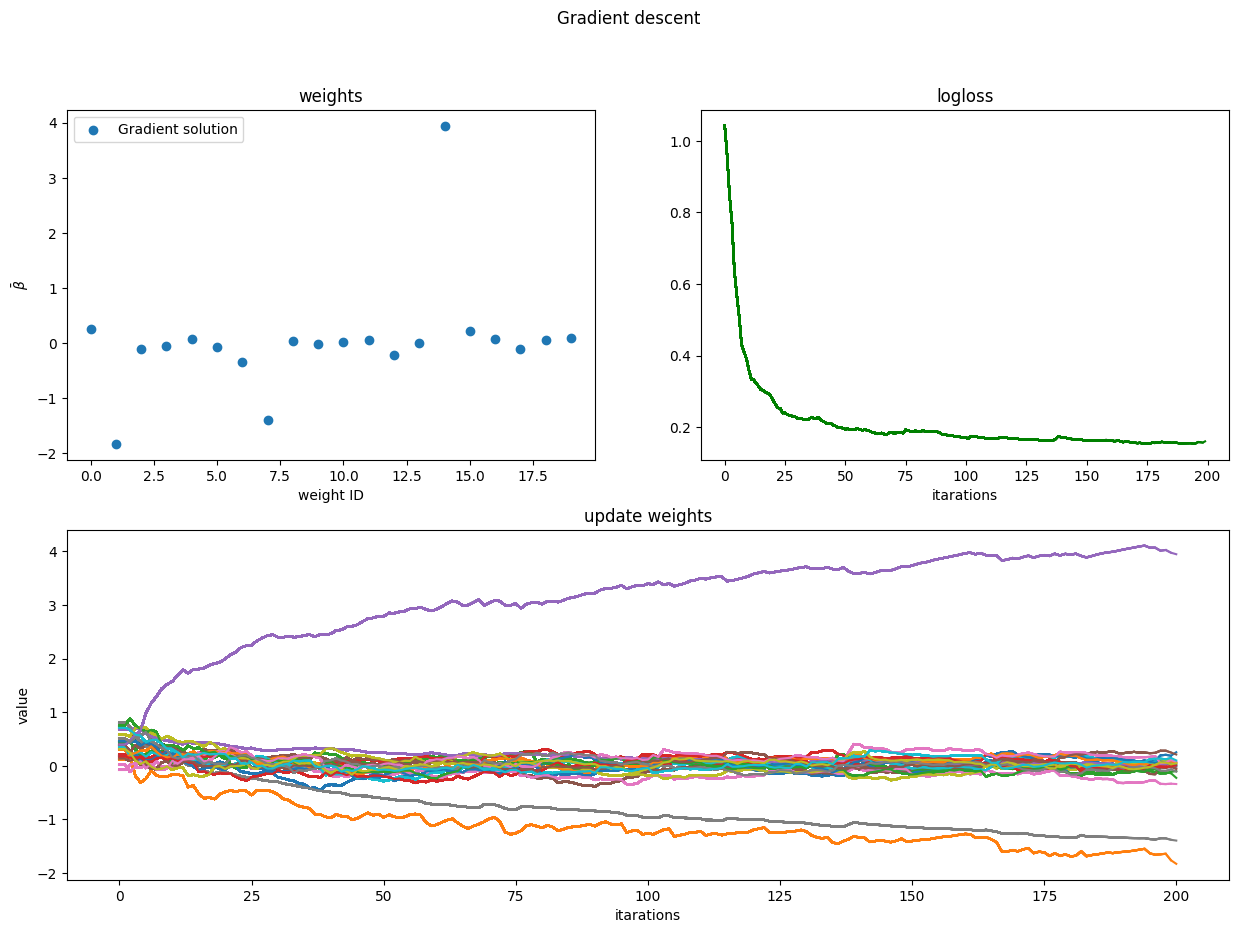

In [50]:
optimal_weights = fit(X, y, iters=200, plot=True)

In [36]:
def train_own_model(X_train, y_train, X_test, y_test, optimal_weights=None, plot=False, iters=100):
    # Обучение модели на обучающем наборе данных
    if optimal_weights is None:
        optimal_weights = fit(X_train, y_train, plot=plot, iters=iters)
    
    # Предсказание целевой переменной для тестового набора данных
    y_pred = binary_class_prediction(optimal_weights, X_test)

    print('\n\t============== My Own LogisticRegression ==============')
    print('\n\t-------------- Classification report --------------')
    print(classification_report(y_test, y_pred))

### Сравним разное число итераций

Iterations:  10

	============== My Own LogisticRegression ==============

	-------------- Classification report --------------
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       998
           1       0.81      0.86      0.83      1002

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000

Iterations:  50

	============== My Own LogisticRegression ==============

	-------------- Classification report --------------
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       998
           1       0.95      0.98      0.96      1002

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000

Iterations:  80

	============== My Own LogisticRegression ==============

	--------------

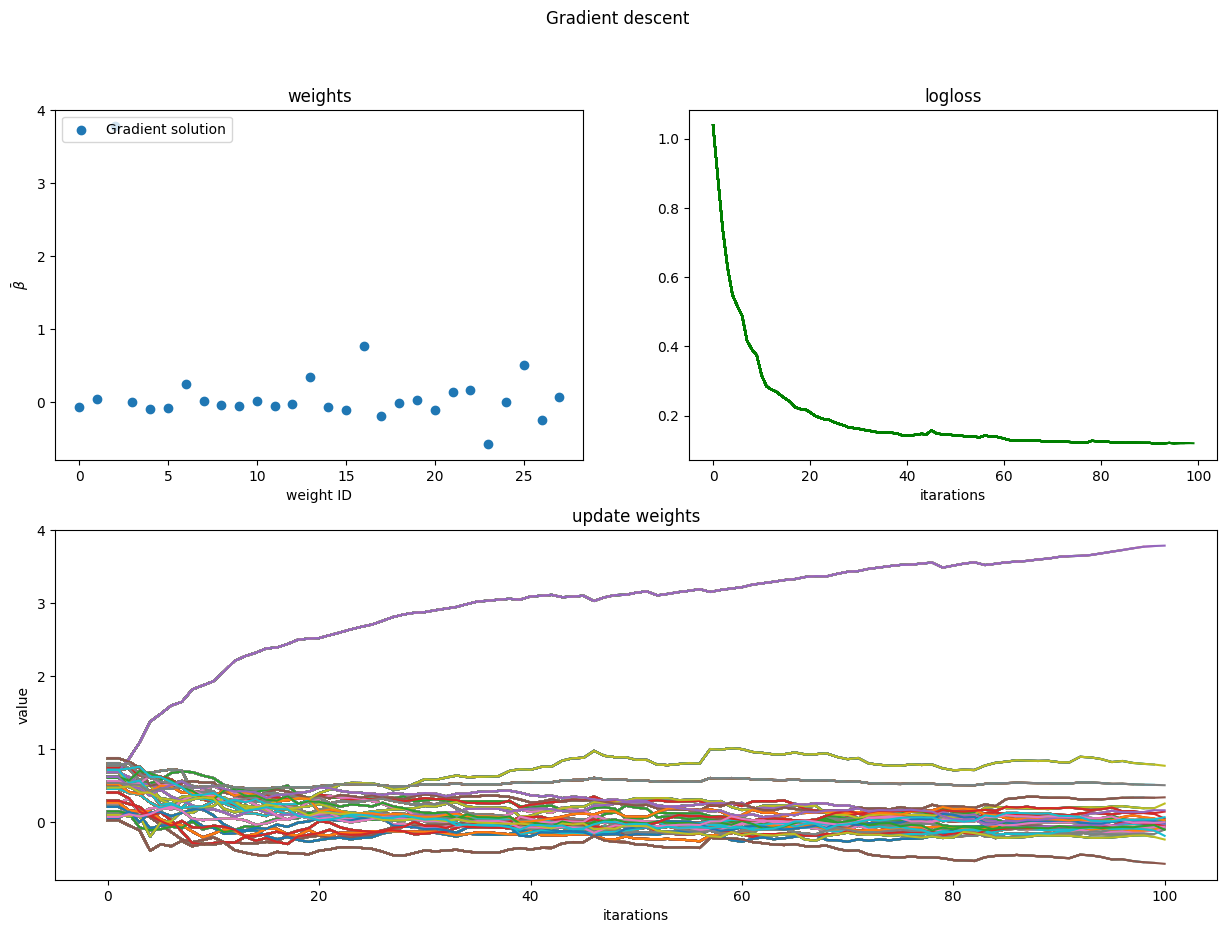

In [28]:
iters = [10, 50, 80, 100]
for it in iters[:-1]:
    print("Iterations: ", it)
    train_own_model(X, y, X, y, iters=it)

print("Iterations: ", iters[-1])    
train_own_model(X, y, X, y, iters=iters[-1], plot=True)

## Теперь проверим работу на выборке из файла weather.csv
### Сравнение логистической регрессии, реализованной самостоятельно с sklearn.linear_model

In [18]:
y_train_numpy = y_train.values # Иначе ругается на оператор @
y_test_numpy = y_test.values # Иначе ругается на оператор @

In [35]:
optimal_weights = fit(X_train, y_train_numpy, iters=3400)

In [40]:
train_own_model(X_train, y_train_numpy, X_test, y_test_numpy, optimal_weights=optimal_weights)
train_model(X_train, y_train, X_test, y_test, LogisticRegression(), manual=False)


	============== My Own LogisticRegression ==============

	-------------- Classification report --------------
              precision    recall  f1-score   support

           0       0.78      0.16      0.27     27882
           1       0.21      0.83      0.34      7667

    accuracy                           0.31     35549
   macro avg       0.50      0.50      0.30     35549
weighted avg       0.66      0.31      0.28     35549


	============== LogisticRegression ==============

	-------------- Classification report --------------
              precision    recall  f1-score   support

           0       0.79      0.94      0.86     27882
           1       0.24      0.07      0.11      7667

    accuracy                           0.75     35549
   macro avg       0.51      0.50      0.48     35549
weighted avg       0.67      0.75      0.69     35549




	============== My Own LogisticRegression ==============

	-------------- Classification report --------------
              precision    recall  f1-score   support

           0       0.87      0.00      0.00     27882
           1       0.22      1.00      0.36      7667

    accuracy                           0.22     35549
   macro avg       0.54      0.50      0.18     35549
weighted avg       0.73      0.22      0.08     35549



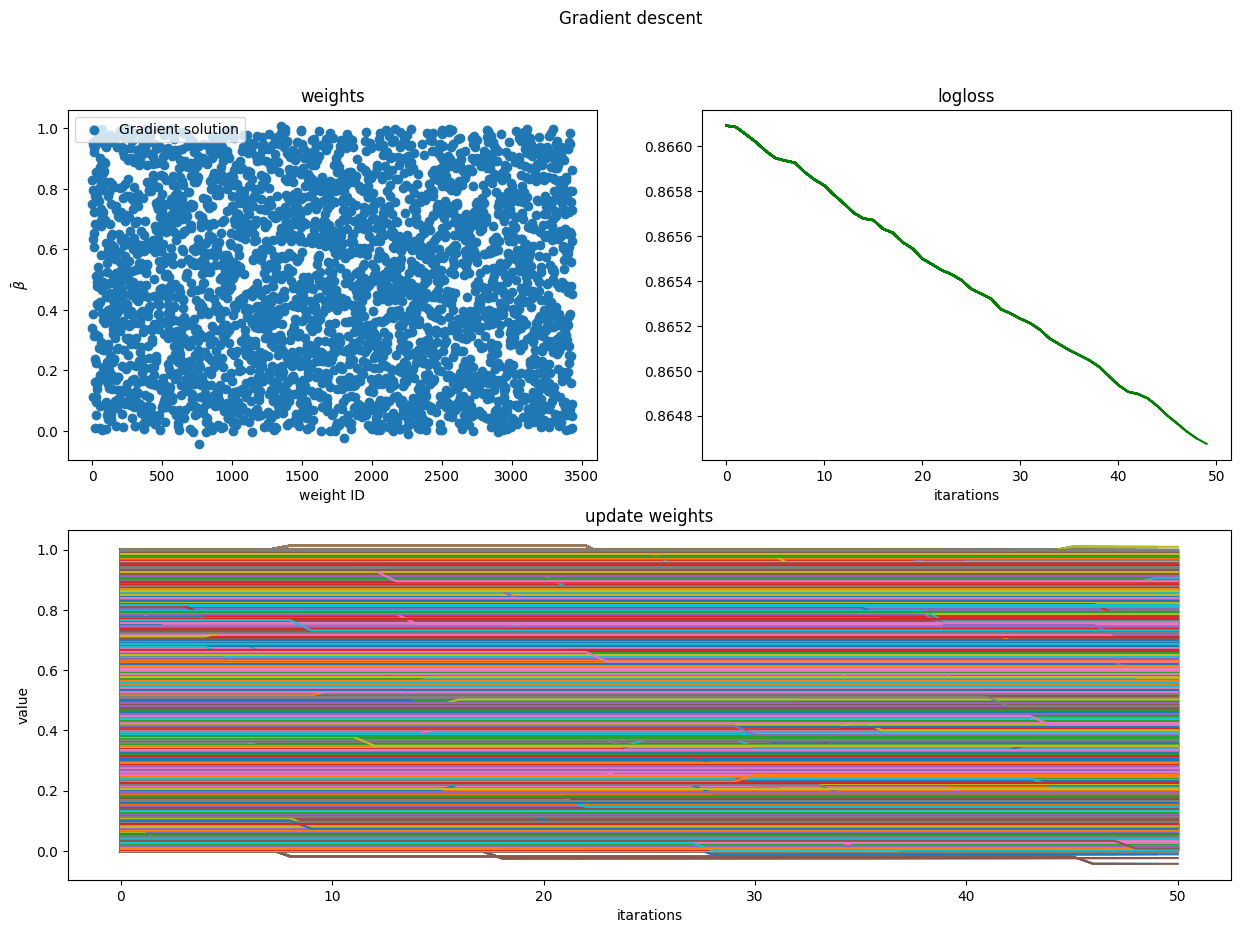

In [19]:
train_own_model(X_train, y_train_numpy, X_test, y_test_numpy, iters=50, plot=True)

---------
## 2. Сравним отчеты разных моделей

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

models = [LogisticRegression(), 
          KNeighborsClassifier(n_neighbors=1), 
          MultinomialNB(), 
          BernoulliNB(),
         ]

train_own_model(X_train, y_train_numpy, X_test, y_test_numpy, optimal_weights=optimal_weights)
for model in models:
    train_model(X_train, y_train, X_test, y_test, model)


	============== My Own LogisticRegression ==============

	-------------- Classification report --------------
              precision    recall  f1-score   support

           0       0.78      0.16      0.27     27882
           1       0.21      0.83      0.34      7667

    accuracy                           0.31     35549
   macro avg       0.50      0.50      0.30     35549
weighted avg       0.66      0.31      0.28     35549


	============== LogisticRegression ==============

	-------------- Classification report --------------
              precision    recall  f1-score   support

           0       0.79      0.94      0.86     27882
           1       0.24      0.07      0.11      7667

    accuracy                           0.75     35549
   macro avg       0.51      0.50      0.48     35549
weighted avg       0.67      0.75      0.69     35549


	============== KNeighborsClassifier ==============

	-------------- Classification report --------------
              precisio

### Пояснения к метрикам Precision Recall Accuracy

Precision и Recall являются метриками, которые помогают оценить качество работы модели в задачах классификации, где есть два или более класса. Они обычно используются в ситуациях, когда классы несбалансированы, то есть имеют разное количество примеров. Accuracy же является метрикой, которая оценивает общую точность работы модели, независимо от классов.

Для примера, представим, что у нас есть задача классификации, в которой есть два класса: "собаки" и "кошки". Допустим, у нас есть модель, которая должна определять, является ли на фото собака или кошка.

Accuracy просто показывает, как часто модель дает правильный ответ, то есть отношение числа правильных ответов к общему числу ответов.

Precision показывает, как много из тех объектов, которые модель отнесла к классу "собаки", действительно являются собаками. Она вычисляется как отношение числа верно классифицированных объектов к числу объектов, которые модель отнесла к классу "собаки".

precision = TP / (TP + FP)

Recall показывает, как много из всех объектов класса "собаки" модель нашла. Она вычисляется как отношение числа верно классифицированных объектов к числу объектов класса "собаки".

recall = TP / (TP + FN)

Таким образом, если модель имеет высокий precision, это означает, что из объектов, которые она отнесла к классу "собаки", большинство действительно являются собаками. Если модель имеет высокий recall, это означает, что она нашла большинство объектов класса "собаки".


|                            | Предсказанные "положительные" | Предсказанные "отрицательные" |
| -------------------------- | ---------------------------- | ------------------------------|
| Истинные "положительные"    | True positives (TP)          | False negatives (FN)           |
| Истинные "отрицательные"    | False positives (FP)         | True negatives (TN)            |

## Выводы

1) Логистическая регрессия, построенная вручную работает сильно медленнее любой другой модели из библиотеки, при этом дает результат recall кардинально отличный от моделей библиотеки.Также она дает самый плохой показатель точности accuracy, но при этом сильно больший показатель полноты recall для дней, когда идет дождь. То есть она отлично научилась предсказывать дни, в которые будет дождь 
2) Из всех моделей наиболее точно предсказывает день, когда дождя не будет - логист регрессия из библиотеки
3) Precision у всех моделей получилась примерно одинаковой. То есть все модели делают примерно одинаковую ошибку при определении будет дождь или нет.
4) Ну и наибольшее отношение правильных в целом предсказаний наблюдается у трех моделей - LogisticRegression, MultinomialNB, BernoulliNB, а именно - 75% (accuracy)